In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

import findspark
findspark.init(r"C:\python311\Lib\site-packages\pyspark")


In [7]:
def generate_time_series(n_points=100, seed=42):
    """
    Generate a synthetic time series as a NumPy array.
    Returns: time indices (t), values (y)
    """
    np.random.seed(seed)
    t = np.arange(n_points)
    y = 0.5 * t + 5 * np.sin(0.1 * t) + np.random.normal(scale=2, size=n_points)
    return t, y


In [8]:

def plot_time_series_and_model(t, y, predictions):
    """
    Plot the original time series and the model predictions.
    """
    plt.figure(figsize=(10,6))
    plt.plot(t, y, label="Original Data", marker='o')
    plt.plot(t, predictions, label="Model Predictions", linestyle='--')
    plt.title("Time Series Data vs PySpark Model Predictions")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.show()



In [9]:
def train_pyspark_model(t, y):
    """
    Train a PySpark Linear Regression model on time series data.
    Converts NumPy arrays into a Spark DataFrame, fits the model,
    and calls the plotting function.
    """
    # Initialize Spark
    spark = SparkSession.builder.appName("TimeSeriesModel").getOrCreate()

    # Convert to Spark DataFrame
    data = list(zip(t.tolist(), y.tolist()))
    df = spark.createDataFrame(data, ["time", "value"])

    # Assemble features
    assembler = VectorAssembler(inputCols=["time"], outputCol="features")
    df_features = assembler.transform(df)

    # Train Linear Regression model
    lr = LinearRegression(featuresCol="features", labelCol="value")
    model = lr.fit(df_features)

    # Predictions
    predictions_df = model.transform(df_features).toPandas()
    predictions = predictions_df["prediction"].values

    # Plot results
    plot_time_series_and_model(t, y, predictions)

    return model

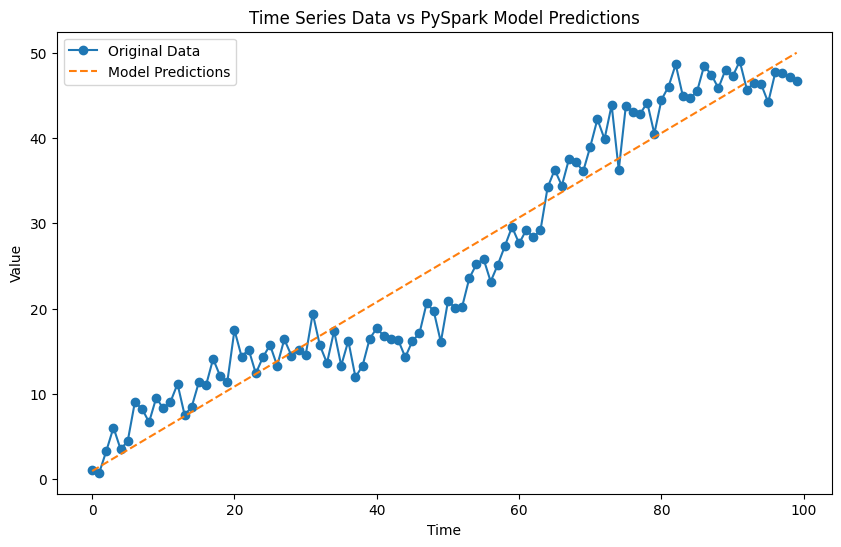

In [10]:
t, y = generate_time_series()
model = train_pyspark_model(t, y)